<a href="https://colab.research.google.com/github/kameda-yoshinari/DataAlgo-T/blob/master/DataAlgo_T(006)_Topological_Sorting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3.4. Topological Sorting

This section takes up topological sorting. 

**Reminder**  
On github, rendering might not be in good shape.  
To see the expected layout, open this page in Google Colaboratory.
To run one specific code cell in colab, click the icon on the left part or just type Ctrl + Enter.  


# Preparation

Connect the Jupyter environment and invoke a runtime. 
Mount your Google Drive by the procedure below.  
Change directory to the mounted point and make it as the working folder.  
By then, files are preserved even after you terminate the runtime environment.

In [ ]:
!echo "Mounting your Google Drive"
from google.colab import drive 
drive.mount('/content/drive')

Mounting your Google Drive
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
!echo "Make a working folder and chnage directory to it"
%cd /content/drive/My\ Drive
%mkdir -p DataAlgo-T/006
%cd       DataAlgo-T/006
!ls

Make a working folder and chnage directory to it
/content/drive/My Drive
/content/drive/My Drive/DataAlgo-T/006
dfs_recursive-short_E	 graph4.h	       topologicalsorting_E.c
dfs_recursive-short_E.c  topologicalsorting_E


Consider Graph G4.  
8 vertices, directed, no cycles.


![da2020-graph4](https://user-images.githubusercontent.com/45651568/84249441-b8381e00-ab45-11ea-9100-7cd745f1940a.jpg)


In [ ]:
%%writefile graph4.h
// 8 vertices, directed, no-weight.
#define N 8
int edge[N][N] = {
//   0 1 2 3 4 5 6 7
	{0,1,0,0,1,0,0,0}, // 0
	{0,0,0,0,0,0,1,0}, // 1
	{0,0,0,1,0,0,1,0}, // 2
	{0,0,0,0,0,0,0,1}, // 3
	{0,0,0,0,0,1,0,0}, // 4
 	{0,0,0,0,0,0,1,0}, // 5
	{0,0,0,0,0,0,0,1}, // 6
	{0,0,0,0,0,0,0,0}  // 7
};

Overwriting graph4.h


# Outline of Topological Sorting

**Explanation**

Consider a directed graph that has not cycles.
有向で閉路のない（非循環でループのない）グラフを対象とする．
Topological sorting is to align all vertices on a line where any directed edges are in same direction. 
Topological sorting is useful whenever you need to serialize the objects (sometimes tasks) where objects have dependencies between them.  

Note that there could be many solutions that satisfy topological sorting for a given graph.

**Example**

Consider the situation that can be described in Graph G4.
It can be said that:
Task 0 should be done before Task 1 and Task 4.
Task 1 should be done before Task 6.
Task 2 should be done before Task 3 and Task 6.
Task 3 should be done before Task 7.
Task 4 should be done before Task 5.
Task 5 should be done before Task 6.
Task 6 should be done before Task 7.

How do you find the topological sorting result?
Up to now, you only learn two algorithms ... BFS and DFS.
Yes, we will re-use one of these two for finding the topological sorting result.
Can you imagine which is used?

...

Before you get the answer, consider how it should be done.  
Pick up any one task first (say Task-A).  
Task-A will be executed just after all the necessary tasks for Task-A have been done.
To figure out all the necessary taskes, first find the adjacent (source) taskes.
Then, for each of the adjacent taskes, find their adjacent tasks again.
This procedure is actually recursive.

...

Yes, what we need is DFS.

**Implementation**

So we copy dfs_recursive-short-E.c program.  
How much do we need to modify the program?
The algorithm we need is very similar to DFS.


# Short C program of DFS in C language (revisit)

**Purpose**

See what happens if we apply DFS to a directed graph and consider how much we need to modify the program.

**Explanation**

Just change the graph from G3 to G4 (graph4.h). Others are same.

**Program**

The behavior of the program should be same.

**Remarks**

If there are some vertices that are not reachable from the starting vertex, they are not on the final listing.   
In Graph G4 case starting at Vertex 0, Vertex 2 and 3 are left unvisited.

---



In [ ]:
%%writefile dfs_recursive-short_E.c
// Depth First Search by recursive call
// kameda[at]ccs.tsukuba.ac.jp, 2020.
#include <stdio.h> // printf()
#include <stdlib.h> // atoi()
#include "graph4.h"

int listed[N];  // 0 not yet, 1 listed

// DFS main body by recursive calls
void dfs(int CurrentRoom){
    int RoomToCheck;

	// It is recognized as being listed.
	listed[CurrentRoom] = 1;
	// Show the listing order.
    printf("Listing: %d\n", CurrentRoom);

    // Choose next
	for (RoomToCheck = 0; RoomToCheck < N; RoomToCheck++) {
        if (edge[CurrentRoom][RoomToCheck] != 0 && listed[RoomToCheck] == 0) 
			dfs(RoomToCheck);
	}
	return;
}

// Main function
int main(int argc, char *argv[]){
    int RoomToCheck;
    int startvertex = 0;
    if (argc == 1) {
        printf("Start vertex not specified, so set No.0 as start.\n");
        startvertex = 0;
    } else if (argc == 2) {
        startvertex = atoi(argv[1]);
        if (startvertex < 0 || startvertex >= N) {
            printf("Illegal ID specified, so quit.\n");
            return -1;
        }
    }

	for (RoomToCheck = 0; RoomToCheck < N; RoomToCheck++)
		listed[RoomToCheck] = 0;

	dfs(startvertex); // Call dfs() with the starting vertex ID

	return 0;
}

Overwriting dfs_recursive-short_E.c


Compile it and check no errors.

In [ ]:
!gcc -Wall -o  dfs_recursive-short_E dfs_recursive-short_E.c

Run the program with starating vertex 0.
Vertex 2 and 3 are left unvisited at Graph G4. 

In [ ]:
!./dfs_recursive-short_E 0

Listing: 0
Listing: 1
Listing: 6
Listing: 7
Listing: 4
Listing: 5


# C program of Topological Sorting

**Purpose**

Rewrite the dfs_recursive-short_E.c program and realize topological sorting.

**Explanation**

In dfs(), just move the "printf()" to the end of the function.
In main(), if the dfs() comes back with some vertices left, find them and set one of them as a starting vertex, and rerun the dfs() again (and again).

**Program**

Check other part are same as the original.

**Remarks**

Escpecially in dfs(), we just move printf(), which cannot affect the program behavior, but yet now it comes to Topological Sorting.

It implies the algorithms might be same even if the given problems look very different.  




In [ ]:
%%writefile topologicalsorting_E.c
// Topological sorting (almost same as DFS)
// kameda[at]ccs.tsukuba.ac.jp, 2020.
#include <stdio.h> // printf()
#include <stdlib.h> // atoi()
#include "graph4.h"

int listed[N];  // 0 not yet, 1 listed

// DFS main body by recursive calls
void dfs(int CurrentRoom){
    int RoomToCheck;

	// It is recognized as being listed.
	listed[CurrentRoom] = 1;

    // Choose next
	for (RoomToCheck = 0; RoomToCheck < N; RoomToCheck++) {
        if (edge[CurrentRoom][RoomToCheck] != 0 && listed[RoomToCheck] == 0) 
			dfs(RoomToCheck);
	}

	// Topological sorting
    printf("Listing: %d\n", CurrentRoom);

	return;
}

// Main function
int main(int argc, char *argv[]){
    int RoomToCheck;
    int startvertex = 0;
    if (argc == 1) {
        printf("Start vertex not specified, so set No.0 as start.\n");
        startvertex = 0;
    } else if (argc == 2) {
        startvertex = atoi(argv[1]);
        if (startvertex < 0 || startvertex >= N) {
            printf("Illegal ID specified, so quit.\n");
            return -1;
        }
    }

	for (RoomToCheck = 0; RoomToCheck < N; RoomToCheck++)
		listed[RoomToCheck] = 0;

	dfs(startvertex); // Call dfs() with the starting vertex ID

    // Same procedure for remaining vertices
    {
        int r;
        for (r = 0; r < N; r++) {
            if (listed[r] == 0) {
                dfs(r);
            }
        }
    }

	return 0;
}

Overwriting topologicalsorting_E.c


Compile it and check no errors.

In [ ]:
!gcc -Wall -o topologicalsorting_E topologicalsorting_E.c

Run it by specifying the starting vertex 0.

In [ ]:
!./topologicalsorting_E 0

Listing: 7
Listing: 6
Listing: 1
Listing: 5
Listing: 4
Listing: 0
Listing: 3
Listing: 2


Double check the result is surely following the order of topological sorting.
Below is a another outlook of the graph G4, following the result.  
You see all the arrows (edges) are in same direction.

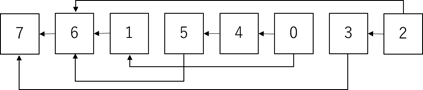

# Problems

1. Complete algorithm  
As long as a given graph is directed and no cycles, topologicalsorting_E.c program always returns the topological sorting result successfully. Try to explain that this is true. 

2. Computation amount  
Discuss the computation amount of time and space of topologicalsorting_E.c program.

3. No cycles  
On topological sorting, there should be no cycles in the graph. Explain the reason.




#**Course Info**

https://github.com/kameda-yoshinari/DataAlgo-T  
Course: Data structure and algorithm  
Department of Engineering Systems, University of Tsukuba,Japan.  
Author: KAMEDA, Yoshinari  
2020.05.19. -  